In [547]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt

In [548]:
def load_data(path, transpose = True):
     data = sio.loadmat(path)
     
     y = data.get('y')
     y = y.reshape(y.shape[0])
     
     X = data.get('X')
     if transpose:
         X = np.asarray([im.reshape((20, 20)).T for im in X]) # [] - list
         X = np.asarray([im.reshape(400) for im in X])
     
     return X, y

In [549]:
X, y = load_data('ex3data1.mat')
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [550]:
def plot_data_one(X, y):
    random_int = np.random.randint(0, 5000)
    x = X[random_int, :]
    y = y[random_int]
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(x.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))
    print('The expected result {}'.format(y))
    

The expected result 4


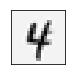

In [551]:
plot_data_one(X, y)

In [552]:
def plot_data_100(X, y):
    size = int(np.sqrt(X.shape[1]))
    
    random_ints = np.random.choice(np.arange(X.shape[0]), 100)
    X = X[random_ints, :]
    y = y[random_ints]
    
    fig, ax = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(10, 10))
    
    for r in range(10):
        for c in range(10):
            ax[r, c].matshow(X[10 * r + c].reshape((size, size)),
                             cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            

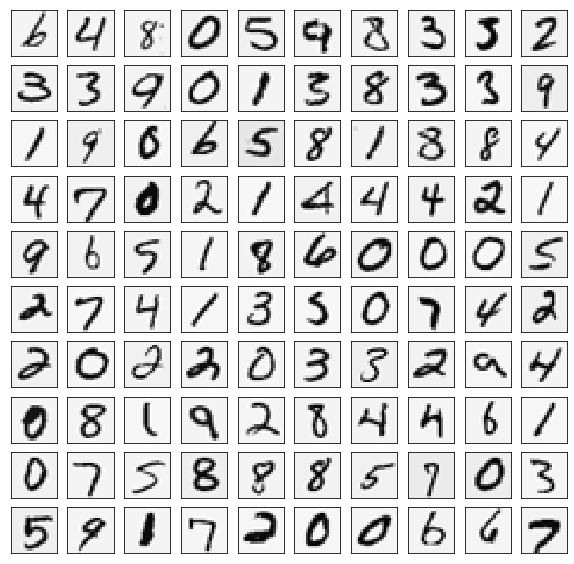

In [553]:
plot_data_100(X, y)

In [554]:
raw_X, raw_y = load_data('ex3data1.mat')
print(raw_X.shape)
print(raw_y.shape)

(5000, 400)
(5000,)


In [555]:
# add intercept=1 for x0
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1)#插入了第一列（全部为1）
X.shape

(5000, 401)

In [556]:
# y have 10 categories here. 1..10, they represent digit 0 as category 10 because matlab index start at 1
# I'll ditit 0, index 0 again
y_matrix = []

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int))    # 见配图 "向量化标签.png"

# last one is k==10, it's digit 0, bring it to the first position，最后一列k=10，都是0，把最后一列放到第一列
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

y.shape

(10, 5000)

In [557]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [558]:
def cost_function(theta, X, y):
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    theta = np.asmatrix(theta)
    
    return np.mean(np.multiply(-y, np.log(sigmoid(np.dot(X, theta.T)))) - np.multiply(1 - y, np.log(1 - sigmoid(np.dot(X, theta.T)))))

In [559]:
def reg_cost(theta, X, y, l = 1):
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    theta = np.asmatrix(theta)
    
    theta_1_n = theta[1:]
    reg = l/len(X) * np.sum(np.power(theta_1_n, 2))
    
    return cost_function(theta, X, y) + reg

In [560]:
def gradient_function(theta, X, y):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    
    return (1./len(X)) * np.dot(X.T, (sigmoid(np.dot(X, theta.T)) - y))

In [561]:
def regularized_gradient(theta, X, y, l=1):
    '''still, leave theta_0 alone'''
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    
    theta_j1_to_n = theta.T[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.asmatrix([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

In [562]:
def gradient(theta, X, y):
    '''just 1 batch gradient'''
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta.T) - y)

def regularized_gradient_func(theta, X, y, l=1):
    '''still, leave theta_0 alone'''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term


def cost(theta, X, y):
    ''' cost fn is -l(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))


In [563]:
def regularized_cost_func(theta, X, y, l=1):
    '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term

In [564]:
theta = np.asmatrix(np.zeros(X.shape[1]))

In [565]:
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [566]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [567]:
np.asmatrix(y[0]).T

matrix([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [568]:
reg_cost_function(theta, X, np.asmatrix(y[0]).T)

0.6931471805599454

In [569]:
regularized_gradient(theta, X, np.asmatrix(y[0]).T)

matrix([[ 4.00000000e-01],
        [ 0.00000000e+00],
        [ 2.46800109e-08],
        [-2.11721903e-07],
        [-8.84572440e-07],
        [-1.03162105e-06],
        [ 1.33602141e-05],
        [ 2.68547692e-05],
        [-5.31570768e-06],
        [-2.26844890e-05],
        [-9.01430709e-05],
        [-1.98763315e-04],
        [-2.79288082e-04],
        [-3.81227788e-04],
        [-2.91160393e-04],
        [-1.06567741e-04],
        [-1.26264025e-05],
        [-1.18951525e-06],
        [-2.67900310e-06],
        [ 1.08081427e-07],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [-1.99142157e-07],
        [ 2.19507970e-06],
        [ 1.10191993e-08],
        [-2.61193866e-05],
        [ 2.37437313e-05],
        [ 1.89888925e-04],
        [ 3.44163025e-04],
        [ 4.37441825e-04],
        [ 9.58797891e-04],
        [ 2.06468963e-03],
        [ 3.69932349e-03],
        [ 4.29586189e-03],
        [ 3.02095269e-03],
        [ 1.39761404e-03],
        [ 3.61779529e-04],
 

In [570]:
def logistic_regression(X, y, l = 1):
    theta = np.asmatrix(np.zeros(X.shape[1]))
    
    return opt.fmin_tnc(func=regularized_cost_func, x0=theta, fprime=regularized_gradient_func, args=(X, y, l))[0]
    #return opt.minimize(fun=reg_cost_function, x0=theta, args=(X, y, l), method='TNC', jac=regularized_gradient, options={'disp': True}).x
    

In [571]:
opt_theta = np.asarray([logistic_regression(X, y[k]) for k in range(0, y.shape[0])])
print(opt_theta.shape)

(10, 401)


In [572]:
def predict(theta, X):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    
    prob = sigmoid(np.dot(X, theta.T))
    
    return (prob >= 0.5).astype(int)

In [573]:
def predict_func(theta, X):
    prob = sigmoid(X @ theta.T)
    return (prob >= 0.5).astype(int)

In [574]:
actual = predict(opt_theta[0], X)
actual_2 = predict_func(opt_theta[0], X)
print('Accuracy {}'.format(np.mean(actual == np.asmatrix(y[0]).T)))

Accuracy 0.9974
